# Prerequisites:

- Download the Yelp dataset from https://www.yelp.com/dataset/download (JSON format).
- Extract the downloaded zip file and upload the JSON files to JupyterLab.
- Make sure the file paths in the code below are correct.

In [1]:
!pip install pandas

In [9]:
!pip install matplotlib

In [2]:
!pip install s3fs==2023.9.2

  Using cached s3fs-2023.9.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached aiobotocore-2.5.4-py3-none-any.whl.metadata (19 kB)
  Using cached fsspec-2023.9.2-py3-none-any.whl.metadata (6.7 kB)
  Using cached botocore-1.31.17-py3-none-any.whl.metadata (5.9 kB)
Using cached s3fs-2023.9.2-py3-none-any.whl (28 kB)
Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
Using cached aiobotocore-2.5.4-py3-none-any.whl (73 kB)
Using cached botocore-1.31.17-py3-none-any.whl (11.1 MB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.162
    Uninstalling botocore-1.34.162:
      Successfully uninstalled botocore-1.34.162
  Attempting uninstall: aiobotocore
    Found existing installation: aiobotocore 2.13.3
    Uninstalling aiobotocore-2.13.3:
      Successfully uninstalled aiobotocore-2.13.3
ERROR: pip'

In [38]:
import pandas as pd 
import s3fs
import gc 
import matplotlib.pyplot as plt

In [6]:
# File paths for each dataset
s3_bucket_path = 's3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/'
business_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/yelp_academic_dataset_business.json' #S3 location of business.json
review_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/yelp_academic_dataset_review.json'  #S3 location of review.json
user_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/yelp_academic_dataset_user.json'  # S3 location of user.json
checkin_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/yelp_academic_dataset_checkin.json' #S3 location of checkin.json
tip_file_path='s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/yelp_academic_dataset_tip.json' #S3 location of tip.json

# Data Import/Export

In [7]:
# Reading data
business_df = pd.read_json(business_file_path, lines=True)

In [8]:
review_df = pd.read_json(review_file_path, lines=True)

In [11]:
user_df = pd.read_json(user_file_path, lines=True)

In [12]:
checkin_df = pd.read_json(checkin_file_path, lines=True)

In [13]:
tip_df = pd.read_json(tip_file_path, lines=True)

In [14]:
# Writing data
business_df.to_csv(s3_bucket_path+'/business_output.csv', index=False)
review_df.to_csv(s3_bucket_path+'/review_output.csv', index=False)
user_df.to_csv(s3_bucket_path+'/user_output.csv', index=False)
checkin_df.to_csv(s3_bucket_path+'/checkin_output.csv', index=False)
tip_df.to_csv(s3_bucket_path+'/tip_output.csv', index=False)

# Data Exploration

## Business Dataframe 

In [21]:
# Data Manipulation
# Selection and Indexing
# Select a single column
print("\nSelecting a single column from Business DataFrame:")
print(business_df['name'])


Selecting a single column from Business DataFrame:
0         Abby Rappoport, LAC, CMQ
1                    The UPS Store
2                           Target
3               St Honore Pastries
4         Perkiomen Valley Brewery
                    ...           
150341                Binh's Nails
150342        Wild Birds Unlimited
150343           Claire's Boutique
150344    Cyclery & Fitness Center
150345                     Sic Ink
Name: name, Length: 150346, dtype: object


In [22]:
# Quick Inspection
print("Business DataFrame Info:")
print(business_df.info())

Business DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None


In [23]:
print("\nFirst few rows of the Business DataFrame:")
print(business_df.head())


First few rows of the Business DataFrame:
              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452 

In [9]:
# Filtering and Sorting
# Filter rows based on a condition
print("\nFiltering businesses with star rating greater than 4:")
print(business_df[business_df['stars'] > 4])


Filtering businesses with star rating greater than 4:
                business_id  \
0    Pns2l4eNsfO8kk83dixA6A   
4    mWMc6_wTdE0EUBKIGXDVfA   
13   jaxMSoInw8Poo3XeMJt8lQ   
14   0bPLkL0QhhPO5kt1_EXmNQ   
16   rBmpy_Y1UbBx8ggHlyb7hA   
..                      ...   
974  zKBIdA2j49REmU2bFR1mdw   
978  oY6osC4Ch3PvguA7D1hh_w   
991  SvcWlFeXbSNkENnZfWYgEQ   
993  OCrqJ_5eS517_2QIYqCmDQ   
999  sDOxVq8gQBpHFYtoxwoLWw   

                                                  name  \
0                             Abby Rappoport, LAC, CMQ   
4                             Perkiomen Valley Brewery   
13                                        Adams Dental   
14                                Zio's Italian Market   
16                            Arizona Truck Outfitters   
..                                                 ...   
974  BayLife Physical Therapy and Rehabilitation- S...   
978                                          Starbucks   
991                                 willow + june 

In [24]:
# Grouping and Aggregation
# Group by a column and calculate the mean
print("\nAverage star rating per business category:")
print(business_df.groupby('city')['stars'].mean())


Average star rating per business category:
city
AB Edmonton    4.500000
AMBLER         3.000000
ARDMORE        3.000000
AVON           3.500000
Abington       3.550296
                 ...   
wilmington     4.000000
wimauma        4.500000
​Clayton       4.000000
​Largo         5.000000
​Lithia        1.500000
Name: stars, Length: 1416, dtype: float64


## Review Dataframe 

In [25]:
# Basic Statistics
print("\nDescriptive statistics of the Review DataFrame:")
print(review_df.info())


Descriptive statistics of the Review DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB
None


In [26]:
print(review_df.describe())

              stars        useful         funny          cool  \
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06   
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01   
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
max    5.000000e+00  1.182000e+03  7.920000e+02  4.040000e+02   
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00   

                                date  
count                        6990280  
mean   2017-01-11 11:22:33.441780992  
min              2005-02-16 03:23:22  
25%    2015-01-25 04:53:50.249999872  
50%              2017-06-03 01:26:07  
75%    2019-05-23 00:02:46.249999872  
max              2022-01-19 19:48:45  
std                              NaN  


In [27]:
# Select multiple columns
print("\nSelecting multiple columns from Review DataFrame:")
print(review_df[['user_id', 'business_id', 'stars', 'date']])


Selecting multiple columns from Review DataFrame:
                        user_id             business_id  stars  \
0        mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw      3   
1        OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ      5   
2        8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A      3   
3        _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA      5   
4        bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ      4   
...                         ...                     ...    ...   
6990275  qskILQ3k0I_qcCMI-k6_QQ  jals67o91gcrD4DC81Vk6w      5   
6990276  Zo0th2m8Ez4gLSbHftiQvg  2vLksaMmSEcGbjI5gywpZA      5   
6990277  mm6E4FbCMwJmb7kPDZ5v2Q  R1khUUxidqfaJmcpmGd4aw      4   
6990278  YwAMC-jvZ1fvEUum6QkEkw  Rr9kKArrMhSLVE9a53q-aA      5   
6990279  6JehEvdoCvZPJ_XIxnzIIw  VAeEXLbEcI9Emt9KGYq9aA      3   

                       date  
0       2018-07-07 22:09:11  
1       2012-01-03 15:28:18  
2       2014-02-05 20:30:30  
3       2015-01-04 00:01:03  
4     

In [28]:
# Sort DataFrame by column values
print("\nSorting Review DataFrame by date:")
print(review_df.sort_values(by='date'))


Sorting Review DataFrame by date:
                      review_id                 user_id  \
4179799  IykJMMZgbNcUndwf1q6ieg  3zBJUlWtPNoZ0uN83ODbyg   
6295220  -O5ng1XLox6uEr4uIZ8u5A  3zBJUlWtPNoZ0uN83ODbyg   
4887456  g80vzN72iU03Wh0fSpq41g  3zBJUlWtPNoZ0uN83ODbyg   
1423159  7Dcrt0Oz0hikA8obGhadrQ  XCsZ3hWa_6oP1WkWvK7pmg   
4884223  WC9q5vhQlQkLK05kEs-vYQ  XCsZ3hWa_6oP1WkWvK7pmg   
...                         ...                     ...   
4878781  11yPqFYtkACY7TWKc5MNzA  lmiiFd9KC15fs4xtEoXRvw   
2710116  L0KaPI67DcTN4wwqfz6A3w  2Mb0st9WVyccaz6sKNLHWw   
6251618  3wqrZowVYwSPEh8p5nLn1g  3TQKP7KlNRdrI2gOkG7slg   
5476035  gUkdqUCMJCJ38HVlLZxlgg  i1PMqye40QWNkJ0MYGHuzg   
4863327  6BXQO_LAmMolJ5BYieGDsA  IH0ToaZ8hJXO2pVieN7dpQ   

                    business_id  stars  useful  funny  cool  \
4179799  2bXm0SynOfxDzfrdrCyXqg      4       0      0     0   
6295220  3g6XqkBikTTbZmTukbeGnw      4       1      0     0   
4887456  PP3BBaVxZLcJU54uP_wL6Q      5       0      0     0   
1423

In [29]:
# Group by multiple columns and apply different aggregations
print("\nAggregations on Review DataFrame grouped by user and business:")
print(review_df.groupby(['business_id']).agg({'stars': 'mean', 'useful': 'sum', 'funny': 'sum', 'cool': 'sum'}))


Aggregations on Review DataFrame grouped by user and business:
                           stars  useful  funny  cool
business_id                                          
---kPU91CF4Lq2-WlRu9Lw  4.500000      16      1    13
--0iUa4sNDFiZFrAdIWhZQ  3.214286      25      3     4
--30_8IhuyMHbSOcNWd6DQ  3.555556       7      2     0
--7PUidqRWpRSpXebiyxTg  1.750000       9      2     0
--7jw19RH9JKXgFohspgQw  4.230769      16      0     0
...                          ...     ...    ...   ...
zznZqH9CiAznbkV6fXyHWA  4.916667      23      3    17
zztOG2cKm87I6Iw_tleZsQ  4.833333       1      0     2
zzu6_r3DxBJuXcjnOYVdTw  3.625000       9      0     3
zzw66H6hVjXQEt0Js3Mo4A  3.600000       4      0     0
zzyx5x0Z7xXWWvWnZFuxlQ  2.500000      12      1     1

[150346 rows x 4 columns]


## Checking for missing data

In [30]:
# Check for missing values 
print("\nChecking for missing values in User DataFrame:")
print(user_df.isnull().sum())


Checking for missing values in User DataFrame:
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [31]:
print("\nChecking for missing values in Tip DataFrame:")
print(tip_df.isnull().sum())


Checking for missing values in Tip DataFrame:
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64


In [33]:
print("\nChecking for missing values in checkin DataFrame:")
print(checkin_df.isnull().sum())


Checking for missing values in checkin DataFrame:
business_id    0
date           0
dtype: int64


In [32]:
# Drop rows with missing values
print("\nDropping rows with missing values in Tip DataFrame:")
print(tip_df.dropna())


Dropping rows with missing values in Tip DataFrame:
                       user_id             business_id  \
0       AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1       NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2       -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3       FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4       ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   
...                        ...                     ...   
908910  eYodOTF8pkqKPzHkcxZs-Q  3lHTewuKFt5IImbXJoFeDQ   
908911  1uxtQAuJ2T5Xwa_wp7kUnA  OaGf0Dp56ARhQwIDT90w_g   
908912  v48Spe6WEpqehsF2xQADpg  hYnMeAO77RGyTtIzUSKYzQ   
908913  ckqKGM2hl7I9Chp5IpAhkw  s2eyoTuJrcP7I_XyjdhUHQ   
908914  4tF1CWdMxvvwpUIgGsDygA  _cb1Vg1NIWry8UA0jyuXnQ   

                                                     text                date  \
0                          Avengers time with the ladies. 2012-05-18 02:17:21   
1       They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2      

In [34]:
# Fill missing values with a specific value
print("\nFilling missing values with 0 in Checkin DataFrame:")
print(checkin_df.fillna(0))


Filling missing values with 0 in Checkin DataFrame:
                   business_id  \
0       ---kPU91CF4Lq2-WlRu9Lw   
1       --0iUa4sNDFiZFrAdIWhZQ   
2       --30_8IhuyMHbSOcNWd6DQ   
3       --7PUidqRWpRSpXebiyxTg   
4       --7jw19RH9JKXgFohspgQw   
...                        ...   
131925  zznJox6-nmXlGYNWgTDwQQ   
131926  zznZqH9CiAznbkV6fXyHWA   
131927  zzu6_r3DxBJuXcjnOYVdTw   
131928  zzw66H6hVjXQEt0Js3Mo4A   
131929  zzyx5x0Z7xXWWvWnZFuxlQ   

                                                     date  
0       2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...  
1       2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...  
2                2013-06-14 23:29:17, 2014-08-13 23:20:22  
3       2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...  
4       2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...  
...                                                   ...  
131925  2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013...  
131926                                2021-06-12 01:16:12 

# Data Visualization


Histogram of stars in Review DataFrame:


<Axes: ylabel='Frequency'>

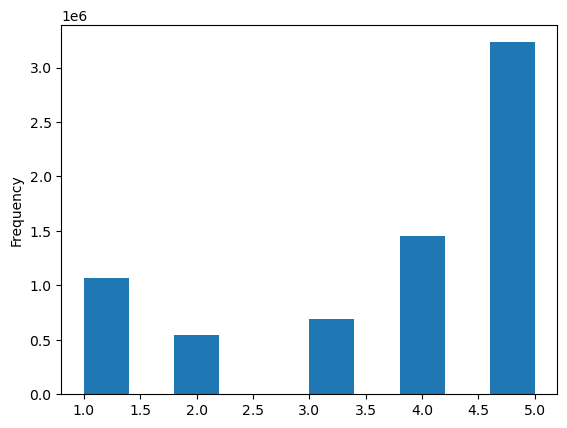

In [36]:
# Plot a histogram
print("\nHistogram of stars in Review DataFrame:")
review_df['stars'].plot(kind='hist')


Scatter plot of stars vs. useful votes in Review DataFrame:


<Axes: xlabel='stars', ylabel='useful'>

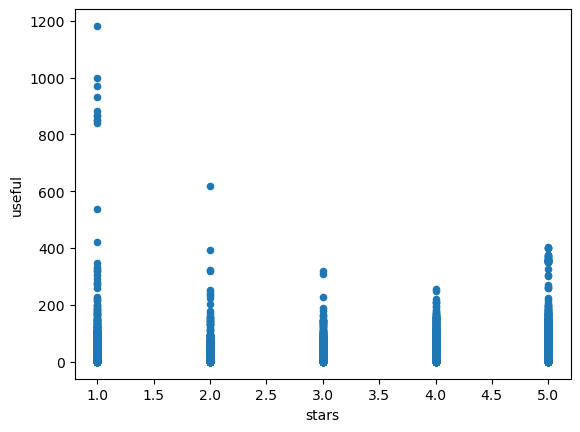

In [37]:
# Scatter plot
print("\nScatter plot of stars vs. useful votes in Review DataFrame:")
review_df.plot(x='stars', y='useful', kind='scatter')

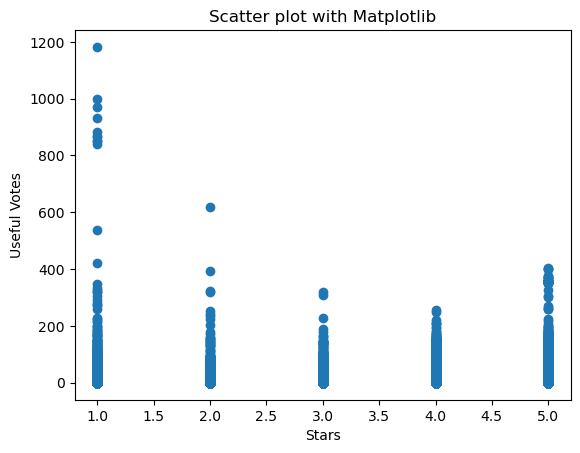

In [40]:
plt.title("Scatter plot with Matplotlib")
plt.xlabel("Stars")
plt.ylabel("Useful Votes")
plt.scatter(review_df['stars'], review_df['useful'])
plt.show()

# Restaurant Reviews in Arizona 

In [41]:
# business_file_path must be of the s3 bucket.

business_df = pd.read_json(business_file_path,lines=True)
# Filter business IDs for Restaurants in Arizona
restaurant_business_ids_az = business_df.dropna(subset=['categories', 'state'])
restaurant_business_ids_az = restaurant_business_ids_az[
    (restaurant_business_ids_az['categories'].apply(lambda x: 'Restaurants' in x)) &
    (restaurant_business_ids_az['state'] == 'AZ')
]['business_id']

In [42]:
restaurant_business_ids_az.head()

45     wghnIlMb_i5U46HMBGx9ig
78     x9K0RfZaT_zlw6DklBDzjw
126    anLQj9AM8vjbcLSIE0iUgg
132    9C2rpb56aQvW0ViZHK9sPw
234    Y6heWJJ9AmEL58fZwgi9YQ
Name: business_id, dtype: object

In [43]:
restaurant_business_ids_az.info()

<class 'pandas.core.series.Series'>
Index: 2671 entries, 45 to 150275
Series name: business_id
Non-Null Count  Dtype 
--------------  ----- 
2671 non-null   object
dtypes: object(1)
memory usage: 41.7+ KB


In [44]:
del business_df
gc.collect()

6

In [47]:
chunksize = 100000  # Adjust this depending on your memory limits
chunks = pd.read_json(review_file_path, lines=True, chunksize=chunksize)
# Optionally, process each chunk and append to a list or concatenate later
review_df = pd.concat(chunk for chunk in chunks)

In [48]:
# Filter reviews based on the selected business IDs
restaurant_reviews_az = review_df[review_df['business_id'].isin(restaurant_business_ids_az)]

In [49]:
# Display basic information about the selected reviews
print("Selected Restaurant Reviews in Arizona :")
print(restaurant_reviews_az.info())

Selected Restaurant Reviews in Arizona :
<class 'pandas.core.frame.DataFrame'>
Index: 267036 entries, 2 to 6990237
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    267036 non-null  object        
 1   user_id      267036 non-null  object        
 2   business_id  267036 non-null  object        
 3   stars        267036 non-null  int64         
 4   useful       267036 non-null  int64         
 5   funny        267036 non-null  int64         
 6   cool         267036 non-null  int64         
 7   text         267036 non-null  object        
 8   date         267036 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 20.4+ MB
None


In [50]:
# Show the first few rows of the selected reviews
print("\nFirst few rows of selected reviews:")
print(restaurant_reviews_az.head())


First few rows of selected reviews:
                  review_id                 user_id             business_id  \
2    saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
14   UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
75   ymhbOMW63B_vGaRFR3XT0A  yZdAhQ_KmKuCZmbBy9YDQg  5Ce3lZksYVkCbrihqylVHQ   
93   onlgwy5qGDEzddsrnIvtWg  pYXeL0RCqus2IfhthYCOyA  W7NxQw8UYFR0HLPrI08tvw   
147  ypFqmURIY41F4pWaMW1VrQ  hToW2eoTAYlOcuNz7I73Cg  7L1kXfwU5XM6f6Jxo_L7Yg   

     stars  useful  funny  cool  \
2        3       0      0     0   
14       4       0      2     0   
75       5       0      0     0   
93       4       0      0     0   
147      5       1      0     0   

                                                  text                date  
2    Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
14   The bun makes the Sonoran Dog. It's like a snu... 2011-10-27 17:12:05  
75   I just started going to Sushi Nara this m

In [51]:
del review_df
gc.collect()

582

In [52]:
restaurant_reviews_az = restaurant_reviews_az[restaurant_reviews_az['date'] > "2020-01-01 00:00:00" ]

In [53]:
restaurant_reviews_az.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48147 entries, 298786 to 6990237
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    48147 non-null  object        
 1   user_id      48147 non-null  object        
 2   business_id  48147 non-null  object        
 3   stars        48147 non-null  int64         
 4   useful       48147 non-null  int64         
 5   funny        48147 non-null  int64         
 6   cool         48147 non-null  int64         
 7   text         48147 non-null  object        
 8   date         48147 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 3.7+ MB


In [56]:
# Save selected restaurant reviews to a CSV file
csv_file_path = s3_bucket_path+'restaurant_reviews_az.csv'
restaurant_reviews_az.to_csv(csv_file_path, index=False)

In [57]:
# Print a message indicating the save was successful
print(f"Selected restaurant reviews in Arizona saved to {csv_file_path}")

Selected restaurant reviews in Arizona saved to s3://amazon-sagemaker-058264306111-us-east-1-e23504aef6c5/dzd_5l5kah6gnsnq3r/bzbm82rtfbxpgn/dev/restaurant_reviews_az.csv
